**Exploratory analysis**

In this notebook, the exploratory analysis of the incidents database, fortune database and qualitative analysis of mission statements were done. The notebook did not result in an exported dataset as the others, it's just the exploratory analysis and to extract the top 5 most common words in the mission statements per subregion and sector.

In [ ]:
import pandas as pd
import numpy as np

**Incidents database**

The incidents database was dowloaded from the official website. The version downloaded was the 21st of july, 2025. The zip file has the reports, incidents and the classification with different taxonomies, including the MIT. I joined the incidents dataset and the taxonomy classification using the incident id.

In [ ]:
incidents = pd.read_csv('AI_incidents\incidents.csv')
mit_classification = pd.read_csv('AI_incidents\classifications_MIT.csv')

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\krist\AppData\Local\Temp\ipykernel_63840\2371350695.py:1: SyntaxWarning: invalid escape sequence '\i'
  incidents = pd.read_csv('AI_incidents\incidents.csv')
C:\Users\krist\AppData\Local\Temp\ipykernel_63840\2371350695.py:2: SyntaxWarning: invalid escape sequence '\c'
  mit_classification = pd.read_csv('AI_incidents\classifications_MIT.csv')


In [ ]:
incidents

,_id,incident_id,date,reports,Alleged deployer of AI system,Alleged developer of AI system,Alleged harmed or nearly harmed parties,description,title
0,ObjectId(625763db343edc875fe639ff),1,2015-05-19,"[1,2,3,4,5,6,7,8,9,10,11,12,14,15]","[""youtube""]","[""youtube""]","[""children""]",YouTube’s content filtering and recommendation...,Google’s YouTube Kids App Presents Inappropria...
1,ObjectId(625763de343edc875fe63a15),23,2017-11-08,"[242,243,244,245,246,247,248,249,250,253,254,2...","[""navya"",""keolis-north-america""]","[""navya"",""keolis-north-america""]","[""navya"",""keolis-north-america"",""bus-passengers""]",A self-driving public shuttle by Keolis North ...,Las Vegas Self-Driving Bus Involved in Accident
2,ObjectId(625763dc343edc875fe63a02),4,2018-03-18,"[629,630,631,632,633,634,635,636,637,638,639,6...","[""uber""]","[""uber""]","[""elaine-herzberg"",""pedestrians""]",An Uber autonomous vehicle (AV) in autonomous ...,Uber AV Killed Pedestrian in Arizona
3,ObjectId(625763dd343edc875fe63a0a),12,2016-07-21,[42],"[""microsoft-research"",""boston-university""]","[""microsoft-research"",""google"",""boston-univers...","[""women"",""minority-groups""]",Researchers from Boston University and Microso...,Common Biases of Vector Embeddings
4,ObjectId(625763dc343edc875fe63a03),5,2015-07-13,"[767,768,769,770,771,772,773,774,775,776,777,778]","[""hospitals"",""doctors""]","[""intuitive-surgical""]","[""patients""]",Study on database reports of robotic surgery m...,Collection of Robotic Surgery Malfunctions
...,...,...,...,...,...,...,...,...,...
1132,ObjectId(686dfa485c01345e1ccf3cac),1144,2024-06-05,"[5500,5501,5502,5503,5504,5505,5506]","[""xai""]","[""xai""]","[""south-memphis-community"",""residents-with-pre...","The xAI ""Colossus"" supercomputer facility in S...",xAI Allegedly Operates Unpermitted Methane Tur...
1133,ObjectId(686ecc7d949af790c69fceb4),1145,2025-02-25,"[5507,5508,5509,5510,5511]","[""jennifer-t.-demaster"",""christopher-i.-kachou...","[""unnamed-large-language-model-developer""]","[""mypillow"",""mike-lindell"",""legal-integrity"",""...","In February 2025, lawyers Christopher I. Kacho...",MyPillow Defense Lawyers in Coomer v. Lindell ...
1134,ObjectId(686ed50eb1991b1bb3b94b6e),1146,2025-07-08,"[5512,5517,5541,5542]","[""xai"",""grok""]","[""xai""]","[""x-(twitter)-users"",""jewish-community"",""gener...",xAI's Grok chatbot reportedly generated multip...,Grok Chatbot Reportedly Posts Antisemitic Stat...
1135,ObjectId(68759c3dbace1fad9bcce59d),1147,2025-07-14,[5515],"[""unknown-scammers-targeting-the-royal-brunei-...","[""unknown-voice-cloning-technology-developer"",...","[""royal-brunei-police-force"",""general-public-o...",The Royal Brunei Police Force issued a public ...,Purportedly AI-Generated Videos Impersonate Br...


In [ ]:
incidents = incidents.merge(mit_classification[['Incident ID', 'Risk Domain','Risk Subdomain']],
                            how='left', left_on= 'incident_id', right_on = 'Incident ID')
incidents

,_id,incident_id,date,reports,Alleged deployer of AI system,Alleged developer of AI system,Alleged harmed or nearly harmed parties,description,title,Incident ID,Risk Domain,Risk Subdomain
0,ObjectId(625763db343edc875fe639ff),1,2015-05-19,"[1,2,3,4,5,6,7,8,9,10,11,12,14,15]","[""youtube""]","[""youtube""]","[""children""]",YouTube’s content filtering and recommendation...,Google’s YouTube Kids App Presents Inappropria...,1.0,1. Discrimination and Toxicity,1.2. Exposure to toxic content
1,ObjectId(625763de343edc875fe63a15),23,2017-11-08,"[242,243,244,245,246,247,248,249,250,253,254,2...","[""navya"",""keolis-north-america""]","[""navya"",""keolis-north-america""]","[""navya"",""keolis-north-america"",""bus-passengers""]",A self-driving public shuttle by Keolis North ...,Las Vegas Self-Driving Bus Involved in Accident,23.0,"7. AI system safety, failures, and limitations",7.3. Lack of capability or robustness
2,ObjectId(625763dc343edc875fe63a02),4,2018-03-18,"[629,630,631,632,633,634,635,636,637,638,639,6...","[""uber""]","[""uber""]","[""elaine-herzberg"",""pedestrians""]",An Uber autonomous vehicle (AV) in autonomous ...,Uber AV Killed Pedestrian in Arizona,4.0,"7. AI system safety, failures, and limitations",7.3. Lack of capability or robustness
3,ObjectId(625763dd343edc875fe63a0a),12,2016-07-21,[42],"[""microsoft-research"",""boston-university""]","[""microsoft-research"",""google"",""boston-univers...","[""women"",""minority-groups""]",Researchers from Boston University and Microso...,Common Biases of Vector Embeddings,12.0,1. Discrimination and Toxicity,1.1. Unfair discrimination and misrepresentation
4,ObjectId(625763dc343edc875fe63a03),5,2015-07-13,"[767,768,769,770,771,772,773,774,775,776,777,778]","[""hospitals"",""doctors""]","[""intuitive-surgical""]","[""patients""]",Study on database reports of robotic surgery m...,Collection of Robotic Surgery Malfunctions,5.0,"7. AI system safety, failures, and limitations",7.3. Lack of capability or robustness
...,...,...,...,...,...,...,...,...,...,...,...,...
1132,ObjectId(686dfa485c01345e1ccf3cac),1144,2024-06-05,"[5500,5501,5502,5503,5504,5505,5506]","[""xai""]","[""xai""]","[""south-memphis-community"",""residents-with-pre...","The xAI ""Colossus"" supercomputer facility in S...",xAI Allegedly Operates Unpermitted Methane Tur...,NaN,NaN,NaN
1133,ObjectId(686ecc7d949af790c69fceb4),1145,2025-02-25,"[5507,5508,5509,5510,5511]","[""jennifer-t.-demaster"",""christopher-i.-kachou...","[""unnamed-large-language-model-developer""]","[""mypillow"",""mike-lindell"",""legal-integrity"",""...","In February 2025, lawyers Christopher I. Kacho...",MyPillow Defense Lawyers in Coomer v. Lindell ...,NaN,NaN,NaN
1134,ObjectId(686ed50eb1991b1bb3b94b6e),1146,2025-07-08,"[5512,5517,5541,5542]","[""xai"",""grok""]","[""xai""]","[""x-(twitter)-users"",""jewish-community"",""gener...",xAI's Grok chatbot reportedly generated multip...,Grok Chatbot Reportedly Posts Antisemitic Stat...,NaN,NaN,NaN
1135,ObjectId(68759c3dbace1fad9bcce59d),1147,2025-07-14,[5515],"[""unknown-scammers-targeting-the-royal-brunei-...","[""unknown-voice-cloning-technology-developer"",...","[""royal-brunei-police-force"",""general-public-o...",The Royal Brunei Police Force issued a public ...,Purportedly AI-Generated Videos Impersonate Br...,NaN,NaN,NaN


In [ ]:
incidents.columns

Index(['_id', 'incident_id', 'date', 'reports',
       'Alleged deployer of AI system', 'Alleged developer of AI system',
       'Alleged harmed or nearly harmed parties', 'description', 'title',
       'Incident ID', 'Risk Domain', 'Risk Subdomain'],
      dtype='object')

In [ ]:
# Ensure 'date' is datetime, and 'reports' is numeric if not already
incidents['date'] = pd.to_datetime(incidents['date'], errors='coerce')

In [ ]:
total_unique_incidents = incidents['incident_id'].nunique()
print(f"Total unique incidents: {total_unique_incidents}")

Total unique incidents: 1137


In [ ]:
incidents.dropna(subset=['Risk Domain'], inplace=True)
total_unique_incidents = incidents['incident_id'].nunique()
print(f"Total unique incidents with risks classification: {total_unique_incidents}")

Total unique incidents with risks classification: 869


In [ ]:
# Calculate the number of unique incidents per Risk Domain
incidents_per_risk_domain = incidents.groupby('Risk Domain')['incident_id'].nunique()

print("--- Number of unique incidents per Risk Domain ---")
print(incidents_per_risk_domain)

--- Number of unique incidents per Risk Domain ---
Risk Domain
1. Discrimination and Toxicity                    200
2. Privacy & Security                              70
3. Misinformation                                  92
4. Malicious Actors & Misuse                      157
5. Human-Computer Interaction                      58
6. Socioeconomic & Environmental Harms             22
7. AI system safety, failures, and limitations    270
Name: incident_id, dtype: int64


C:\Users\krist\AppData\Local\Temp\ipykernel_63840\3296816283.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


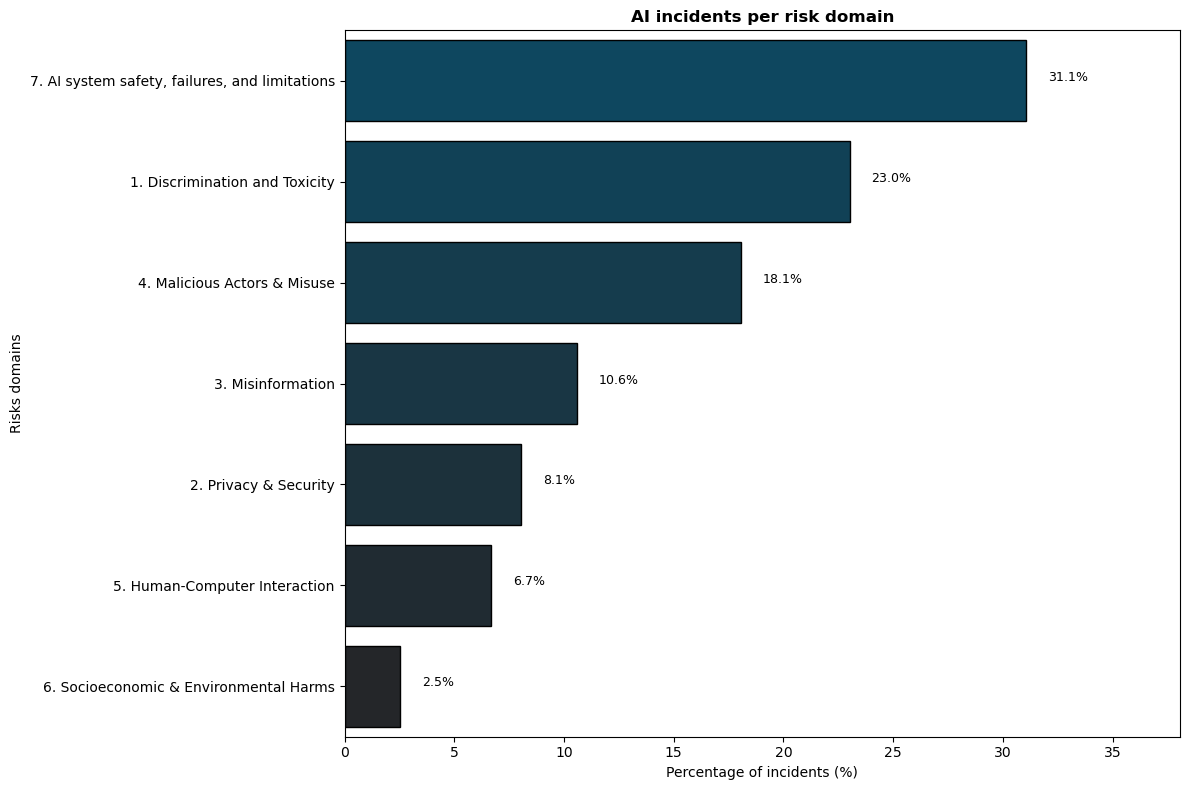

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#The count of incidents were separated and normalized to observe the count in percentages
incidents_counts = incidents['Risk Domain'].value_counts(normalize=True)*100
#The plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=incidents_counts.values,
    y=incidents_counts.index,
    palette="dark:#004c6d_r",
    edgecolor="black")

#To improve the design of the percentages
for i, percent in enumerate(incidents_counts):
    plt.text(percent + 1, i, f"{percent:.1f}%", va='baseline', fontsize=9)

# Set x-axis limits. This line was searched on chat gpt in order to avoid cutting in the percentages
plt.xlim(0, incidents_counts.max() + 7)

plt.title("AI incidents per risk domain", fontsize=12, fontweight='bold')
plt.xlabel("Percentage of incidents (%)", fontsize=10)
plt.ylabel("Risks domains", fontsize=10)
plt.tight_layout()

plt.show()


C:\Users\krist\AppData\Local\Temp\ipykernel_63840\798245902.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


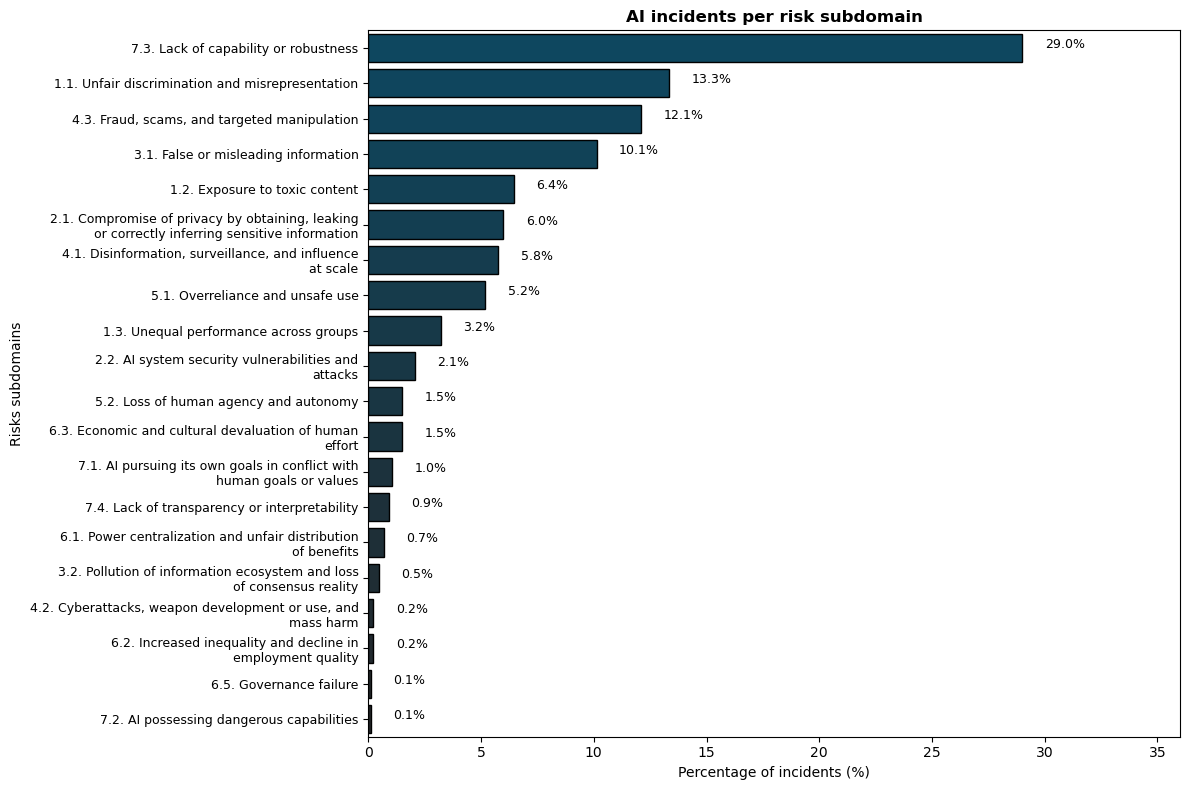

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

#The count of incidents were separated and normalized to observe the count in percentages
incidents_counts = incidents['Risk Subdomain'].value_counts(normalize=True)*100
wrapped_labels = [textwrap.fill(label, width=50) for label in incidents_counts.index]

#The plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=incidents_counts.values,
    y=wrapped_labels,
    palette="dark:#004c6d_r",
    edgecolor="black")

#To improve the design of the percentages
for i, percent in enumerate(incidents_counts):
    plt.text(percent + 1, i, f"{percent:.1f}%", va='baseline', fontsize=9)

plt.xlim(0, incidents_counts.max() + 7)
# Labels and title
plt.title("AI incidents per risk subdomain", fontsize=12, fontweight='bold')
plt.xlabel("Percentage of incidents (%)", fontsize=10)
plt.ylabel("Risks subdomains", fontsize=10)
plt.yticks(fontsize=9)
plt.tight_layout()

plt.show()


In [ ]:
#incidents.to_csv('incidents_mit.csv') #the final dataset of incidents with the MIT classification

## **Fortune Global 500**

The following lines of code describe the process to explore the Fortune global 500. The maps I used on the dissertation were made on QGIS using the geopackages I exported here in this notebook.

In [ ]:
import pandas as pd
fortune = pd.read_excel('Missions.xlsx', sheet_name="Fortune500") #the database with all the companies in the fortune 500
fortune= fortune[fortune["Validated"]==1] #only filtered the companies with valid mission statements
fortune

,ID,Company,Revenues ($M),Revenue Percent Change,Profits ($M),Profits Percent Change,Assets ($M),Employees,ID BvD,ISO,...,Mission_manual,URL_manual,Original,Sector,Industries,Validated,Missions_validated,Sector BvD,Description,l
0,1,Walmart,"$648,125",0.06,"$15,511",0.328,"$252,399",2100000,#ERROR!,US,...,NaN,NaN,NaN,Retailing,General Merchandisers,1.0,We aim to build a better world — helping peopl...,Retail,"Walmart Inc., incorporated on October 31, 1969...",3124
1,2,Amazon,"$574,785",0.118,"$30,425",-,"$527,854",1525000,#ERROR!,US,...,NaN,NaN,NaN,Retailing,Internet Services and Retailing,1.0,"As part of Amazon, we strive to be Earth’s mos...",Retail,"Amazon.com, Inc. provides a range of products ...",3933
2,3,State Grid,"$545,947.5",0.03,"$9,204.3",0.124,"$781,126.2",1361423,#ERROR!,CN,...,NaN,NaN,NaN,Energy,Utilities,1.0,"Power Your Beautiful Life, Empower Our Beautif...",NaN,Engaged in the operation and management of ele...,122
3,4,Saudi Aramco,"$494,890.1",-0.18,"$120,699.3",-0.241,"$660,819.2",73311,#ERROR!,SA,...,NaN,NaN,NaN,Energy,"Mining, Crude-Oil Production",1.0,"Aramco strives to provide reliable, affordable...",Mining & Extraction,"The company is engaged in the exploration, pro...",3687
4,5,Sinopec Group,"$429,699.7",-0.088,"$9,393.4",-0.027,"$382,688",513434,#ERROR!,CN,...,Powering a better life,http://www.sinopecgroup.com/group/en/000/000/0...,NaN,Energy,Petroleum Refining,1.0,Powering a better life,Mining & Extraction,"China Petroleum & Chemical Corporation (the ""C...",2499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Subaru,"$32,540.1",0.167,"$2,664.4",0.799,"$31,835.4",37693,#ERROR!,JP,...,NaN,NaN,NaN,Motor Vehicles and Parts,Motor Vehicles and Parts,1.0,We aim to be a compelling company with a stron...,Transport Manufacturing,The Companyis a Japan-based company engaged in...,716
495,496,Air France-KLM Group,"$32,452.3",0.169,"$1,009.7",0.319,"$38,093.7",76271,#ERROR!,FR,...,NaN,NaN,NaN,Transportation,Airlines,1.0,to be at the forefront of a more responsible E...,"Transport, Freight & Storage",The Company is one of the world's leading airl...,521
496,497,Enbridge,"$32,349.5",-0.21,"$4,588.3",0.988,"$136,769.6",12450,#ERROR!,CA,...,to be the first choice for energydelivery in N...,https://www.enbridge.com/~/media/Enb/Documents...,NaN,Energy,Pipelines,1.0,to be the first choice for energydelivery in N...,Utilities,Enbrige Inc (formerly IPL Energy Inc) is engag...,3147
497,498,ABB,"$32,235",0.095,"$3,745",0.513,"$40,940",107900,#ERROR!,CH,...,NaN,NaN,NaN,Industrials,Industrial Machinery,1.0,to enable a more sustainable and resource-effi...,"Industrial, Electric & Electronic Machinery",The history of ABB Ltd was started through the...,3084


In [ ]:
fortune.columns

Index(['ID', 'Company', 'Revenues ($M)', 'Revenue Percent Change',
       'Profits ($M)', 'Profits Percent Change', 'Assets ($M)', 'Employees',
       'ID BvD', 'ISO', 'Company BvD', 'Mission_Chat', 'URL_Chat',
       'Inspection', 'Mission_manual', 'URL_manual', 'Original', 'Sector',
       'Industries', 'Validated', 'Missions_validated', 'Sector BvD',
       'Description', 'l'],
      dtype='object')

In [ ]:
import geopandas

# Count companies per country
company_counts = fortune['ISO'].value_counts().reset_index()
company_counts.columns = ['ISO', 'company_count']

# the nature earth map
map_url = "https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip"
world = geopandas.read_file(map_url)

# merge the count with the nature dataset
world_companies = world.merge(company_counts, left_on='ISO_A2_EH', right_on='ISO', how='left')

# Replace null values with 0 for countries with no companies
world_companies['company_count'] = world_companies['company_count'].fillna(0)
world_companies= world_companies[world_companies["TYPE"].isin(['Country','Sovereign country'])]

# I grouped the geometries by the 'SUBREGION' column
# and summed the 'company_count' for all countries within each subregion.
subregion_data = world_companies.dissolve(by='SUBREGION', aggfunc={'company_count': 'sum'})
subregion_data = subregion_data.reset_index()


# I exported the to a geopackage to be used on QGIS
#output_filename = 'missions_by_subregion_for_qgis.gpkg'
#subregion_data.to_file(output_filename, driver='GPKG')

In [ ]:
subregion_data.company_count.sum()

np.float64(441.0)

/tmp/ipython-input-36568725.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




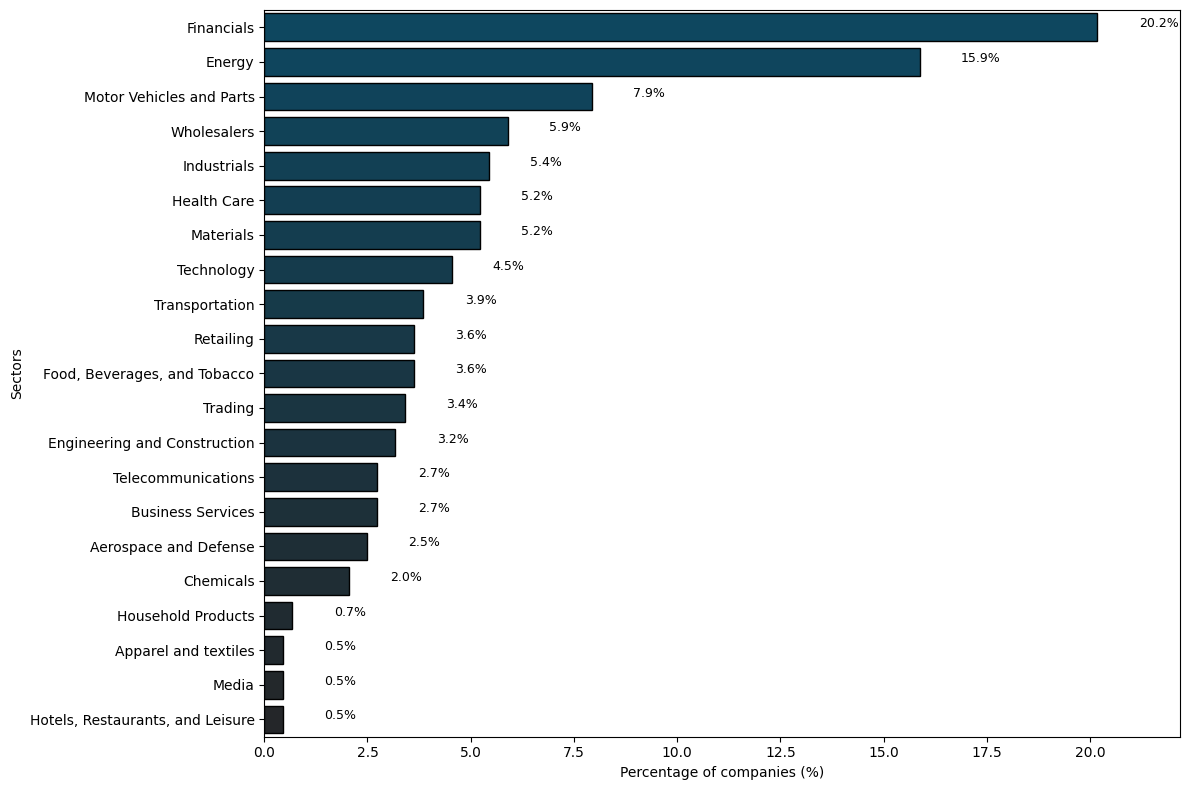

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#The count of companies were separated and normalized to observe the count in percentages
fortune_counts = fortune['Sector'].value_counts(normalize=True)*100
#The plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=fortune_counts.values,
    y=fortune_counts.index,
    palette="dark:#004c6d_r",
    edgecolor="black")

#To improve the design of the percentages
for i, percent in enumerate(fortune_counts):
    plt.text(percent + 1, i, f"{percent:.1f}%", va='baseline', fontsize=9)

plt.xlim(0, fortune_counts.max() + 2)
# Labels and title
plt.xlabel("Percentage of companies (%)", fontsize=10)
plt.ylabel("Sectors", fontsize=10)
plt.tight_layout()

plt.show()

## **Mission statement analysis**

The following lines describe the process to count the 5 most common words on the mission statements per subregion and sector.

In [ ]:
import re
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
all_stopwords = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 9.3 MB/s eta 0:00:00


In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.stem import PorterStemmer, WordNetLemmatizer
import contractions
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
from nltk.tag import pos_tag
def get_wordnet_pos(word):
    """Map NLTK POS tag to WordNet POS tag for lemmatization."""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


def preprocess_text(text):
  """the tokenization and lemmatization process"""
    if pd.isna(text):
        return ""

    expanded_text = contractions.fix(str(text))
    expanded_text = expanded_text.lower()
    expanded_text = re.sub(r'[^a-z\s]', '', expanded_text)
    tokens = nltk.word_tokenize(expanded_text)
    tokens = [i for i in tokens if i not in all_stopwords]
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    proccessed_text = " ".join(lemmatized_tokens)

    return proccessed_text

In [ ]:
fortune["missions_lemmatized"] = fortune["Missions_validated"].apply(preprocess_text)

In [ ]:
from collections import Counter
import pandas as pd

# Get unique sectors
sectors = fortune['Sector'].dropna().unique()

# Store common words for each sector
common_words_per_sector = {}

for sector in sectors:
    # Filter missions for the current sector
    sector_df = fortune[fortune['Sector'] == sector]

    # Concatenate all processed text for this sector
    all_text_in_sector = " ".join(sector_df['missions_lemmatized'].dropna())

    # Count word frequencies
    words = all_text_in_sector.split()
    word_counts = Counter(words)

    # Get the 5 most common words
    common_words_per_sector[sector] = word_counts.most_common(5)

# A list of dictionaries to build the DataFrame
table_data = []
for sector, top_words in common_words_per_sector.items():
    words = [word for word, count in top_words]
    table_data.append({'Sector': sector, 'Top 5 Words': ', '.join(words)})


df_top_words_simple = pd.DataFrame(table_data)
print(df_top_words_simple.to_string())

                              Sector                                               Top 5 Words
0                          Retailing                          well, make, life, help, customer
1                             Energy                  energy, sustainable, life, world, people
2                         Technology                   technology, world, every, value, create
3                        Health Care                   health, life, people, medicine, improve
4           Motor Vehicles and Parts                     customer, value, world, provide, life
5       Engineering and Construction           environment, well, energy, infrastructure, life
6                        Wholesalers                    customer, people, food, every, product
7                            Trading                       society, global, value, good, world
8                         Financials               financial, customer, value, people, service
9                        Industrials              

In [ ]:
from collections import Counter
import pandas as pd

# Merge fortune data with output_gdf to include missions_lemmatized
output_gdf_merged = output_gdf.merge(fortune[['ISO', 'missions_lemmatized']], on='ISO', how='left')

output_gdf_filtered = output_gdf_merged[output_gdf_merged['FCLASS_TLC'] == 'Admin-0 country']

# Get unique subregions from the filtered data
subregions = output_gdf_filtered['SUBREGION'].dropna().unique()

# Store common words for each subregion
common_words_per_subregion = {}

for subregion in subregions:
    # Filter for the current subregion
    subregion_df = output_gdf_filtered[output_gdf_filtered['SUBREGION'] == subregion]

    # Concatenate all processed text for this subregion
    all_text_in_subregion = " ".join(subregion_df['missions_lemmatized'].dropna())

    # Count word frequencies
    words = all_text_in_subregion.split()
    word_counts = Counter(words)

    # Get the 5 most common words
    common_words_per_subregion[subregion] = word_counts.most_common(5)

# a list of dictionaries to build the DataFrame
table_data = []
for subregion, top_words in common_words_per_subregion.items():
    words = [word for word, count in top_words]
    table_data.append({'Subregion': subregion, 'Top 5 Words': ', '.join(words)})

df_top_words_simple = pd.DataFrame(table_data)
print(df_top_words_simple.to_string())

                    Subregion                                       Top 5 Words
0          South-Eastern Asia  sustainable, energy, value, stakeholder, partner
1               South America              energy, best, people, life, business
2                Western Asia         value, aim, business, sustainable, energy
3               Southern Asia          value, ensure, provide, energy, solution
4                Eastern Asia              well, society, life, customer, value
5              Eastern Africa                                                  
6              Western Europe      sustainable, people, future, customer, world
7             Northern Africa                                                  
8             Central America   energy, development, people, security, national
9               Middle Africa                                                  
10             Eastern Europe          energy, natural, resource, make, provide
11            Southern Africa           